In [7]:
import os

train_dir = "/kaggle/input/plant-leaf-diseases-dataset/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/kaggle/input/plant-leaf-diseases-dataset/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/valid"

print("Train directory exists:", os.path.exists(train_dir))
print("Valid directory exists:", os.path.exists(valid_dir))

Train directory exists: False
Valid directory exists: False


In [21]:
import os
base_dir = "/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
print(os.listdir(base_dir))  # Show available classes

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

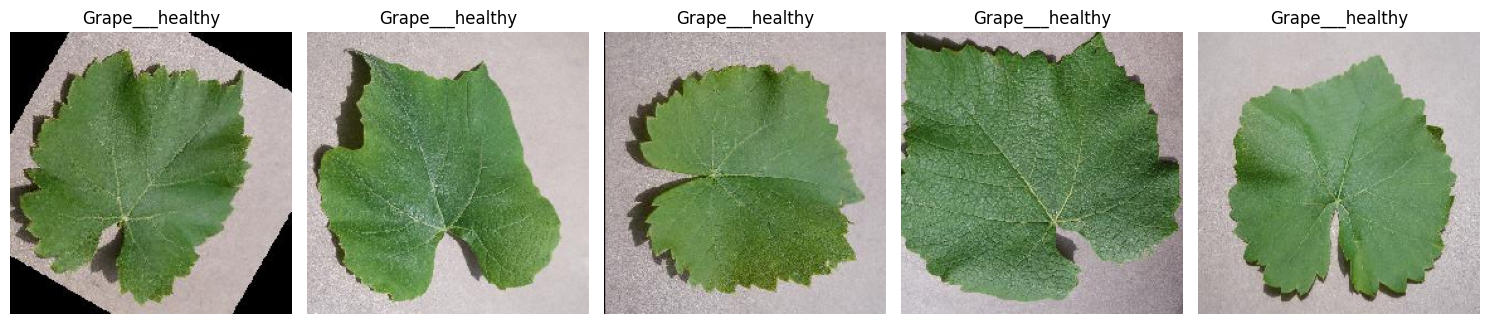

In [22]:
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the dataset path
train_dir = "/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"

# Get class names
class_names = os.listdir(train_dir)

# Select a random class
random_class = random.choice(class_names)
class_path = os.path.join(train_dir, random_class)

# Get some images from the selected class
image_files = os.listdir(class_path)
random_images = random.sample(image_files, 5)  # Select 5 random images

# Plot images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, img_file in enumerate(random_images):
    img_path = os.path.join(class_path, img_file)
    img = load_img(img_path, target_size=(224, 224))  # Resize image
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(random_class)  # Show class label

plt.tight_layout()
plt.show()

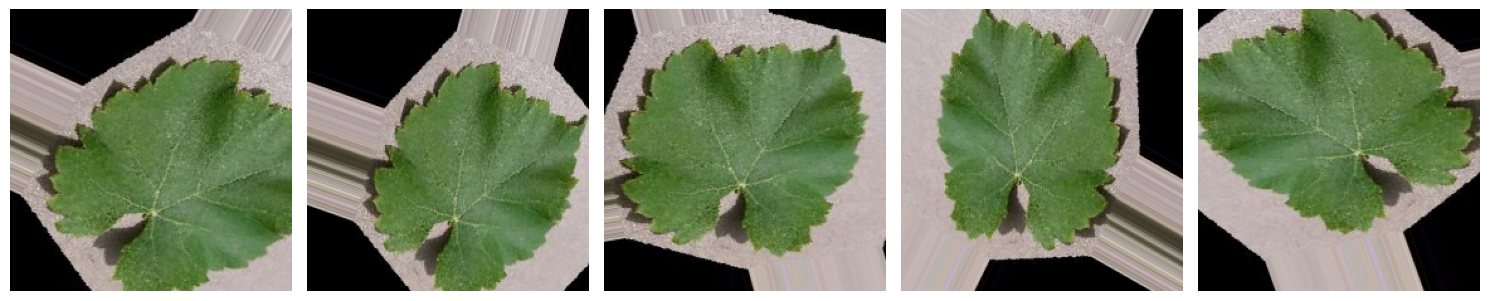

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Load a single image
sample_img_path = os.path.join(class_path, random_images[0])
sample_img = load_img(sample_img_path, target_size=(224, 224))
sample_array = img_to_array(sample_img)
sample_array = np.expand_dims(sample_array, axis=0)  # Add batch dimension

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, batch in enumerate(datagen.flow(sample_array, batch_size=1)):
    aug_img = batch[0].astype("uint8")  # Convert to uint8 format for display
    axes[i].imshow(aug_img)
    axes[i].axis("off")
    if i == 4:  # Stop after 5 images
        break

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


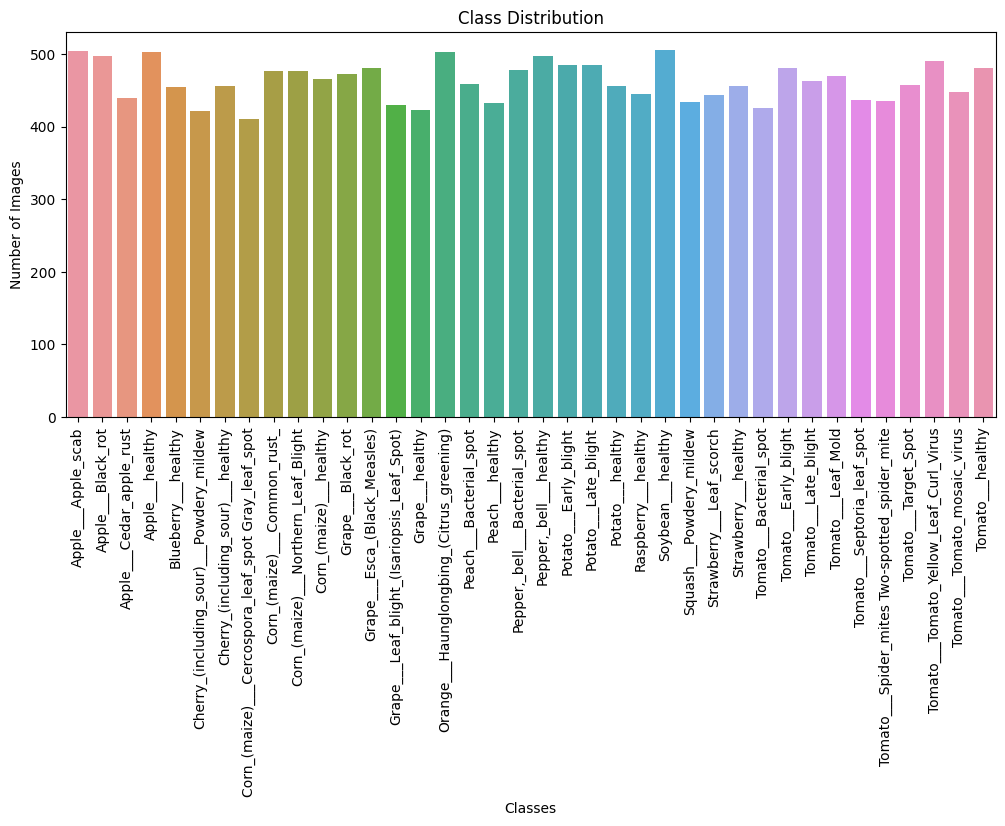

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

class_counts = Counter(valid_generator.classes)
plt.figure(figsize=(12,5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(ticks=range(len(class_counts)), labels=valid_generator.class_indices.keys(), rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
import numpy as np

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = "/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [11]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# 🔥 Unfreeze Last 5 Layers for Fine-Tuning
for layer in base_model.layers[:-5]:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
x = base_model.output
x = GlobalAveragePooling2D()(x)  # ✅ Better than Flatten
x = Dense(1024, activation="swish")(x)  # ✅ Swish > ReLU
x = BatchNormalization()(x)  # ✅ Normalize activations
x = Dropout(0.5)(x)  # ✅ Reduce overfitting

x = Dense(512, activation="swish")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output_layer)

In [17]:
model.compile(
    optimizer=AdamW(learning_rate=0.0001, weight_decay=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [19]:
# 🔥 Reduce LR if No Improvement
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1, min_lr=1e-6)

# 🔥 Stop Training if No Improvement
early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

# 🔥 Cyclical Learning Rate (CLR) for Fast Convergence
def clr_schedule(epoch):
    lr = 0.0001 * (0.85 ** epoch)  # Exponential Decay
    return lr

clr = LearningRateScheduler(clr_schedule)

In [20]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,  # 🔥 10 Epochs Only
    callbacks=[reduce_lr, early_stop, clr],
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1796s 806ms/step - accuracy: 0.6395 - loss: 1.2744 - val_accuracy: 0.8523 - val_loss: 0.5315 - learning_rate: 1.0000e-04
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1608s 730ms/step - accuracy: 0.9118 - loss: 0.2785 - val_accuracy: 0.9508 - val_loss: 0.1527 - learning_rate: 8.5000e-05
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 951s 432ms/step - accuracy: 0.9401 - loss: 0.1876 - val_accuracy: 0.9433 - val_loss: 0.2015 - learning_rate: 7.2250e-05
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9507 - loss: 0.1478
Epoch 4: ReduceLROnPlateau reducing learning rate to 3.070625098189339e-05.
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 952s 432ms/step - accuracy: 0.9507 - loss: 0.1478 - val_accuracy: 0.9421 - val_loss: 0.1754 - learning_rate: 3.0706e-05
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 943s 428ms/step - accuracy: 0.9585 - loss: 0.1231 - val_accuracy: 0.9589 - val_loss: 0.1322 - learning_rate: 5.2201e-05
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 92

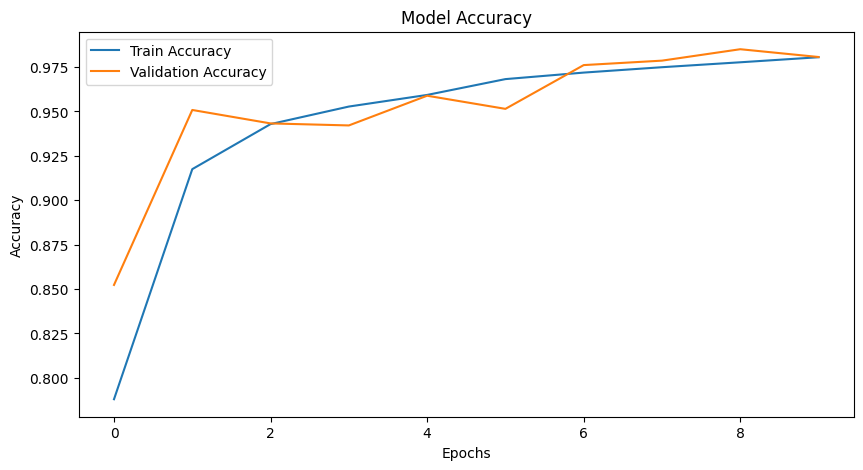

In [25]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

550/550 ━━━━━━━━━━━━━━━━━━━━ 84s 152ms/step


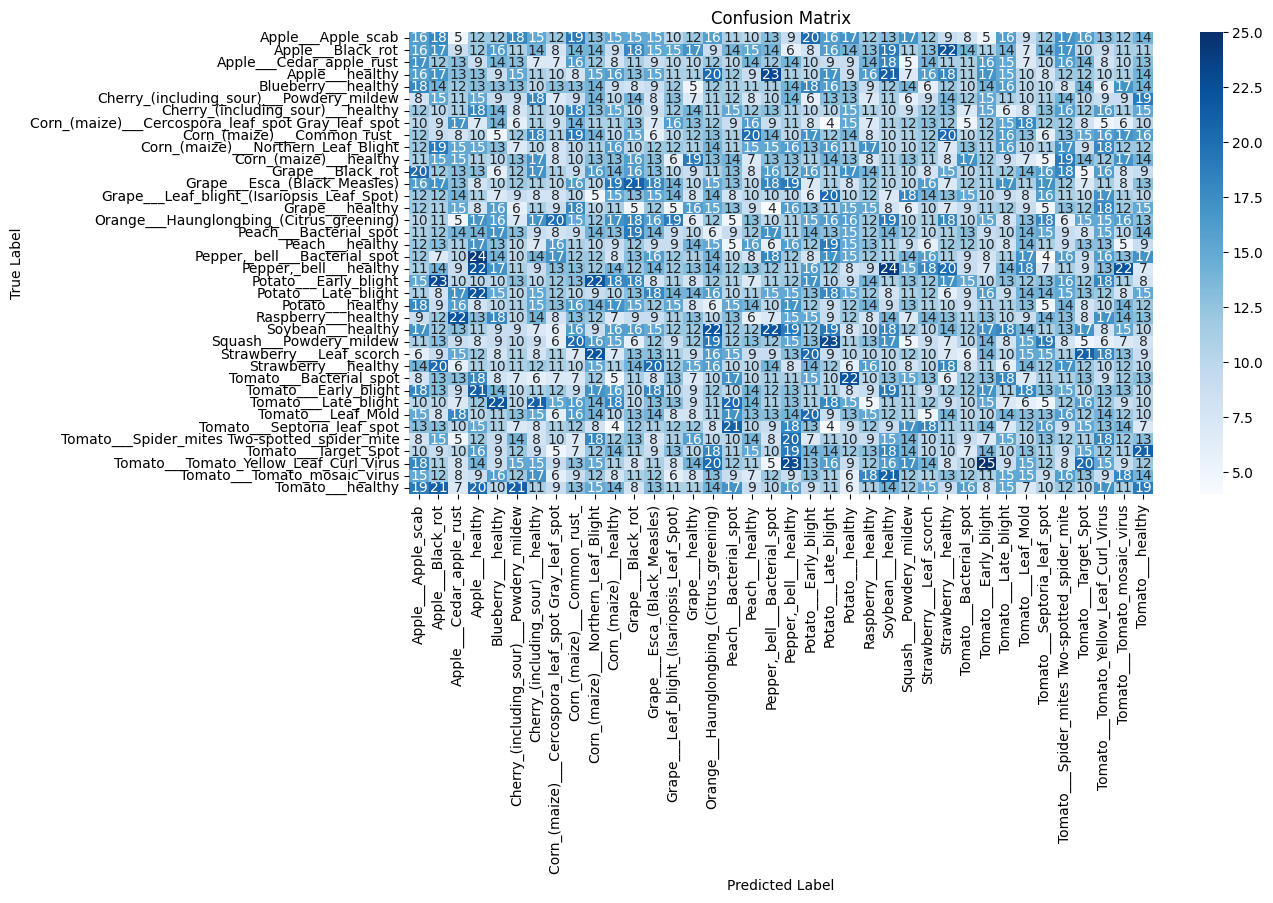

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       504
                                 Apple___Black_rot       0.03      0.03      0.03       497
                          Apple___Cedar_apple_rust       0.03      0.03      0.03       440
                                   Apple___healthy       0.03      0.03      0.03       502
                               Blueberry___healthy       0.03      0.03      0.03       454
          Cherry_(including_sour)___Powdery_mildew       0.02      0.02      0.02       421
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.02      0.02      0.02       410
                       Corn_(maize)___Common_rust_       0.04      0.04      0.04       477
               Corn_(maize)___Northern_Leaf_Blight       0.02      0.02      0.

In [26]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels & predictions
y_true = valid_generator.classes
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=valid_generator.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


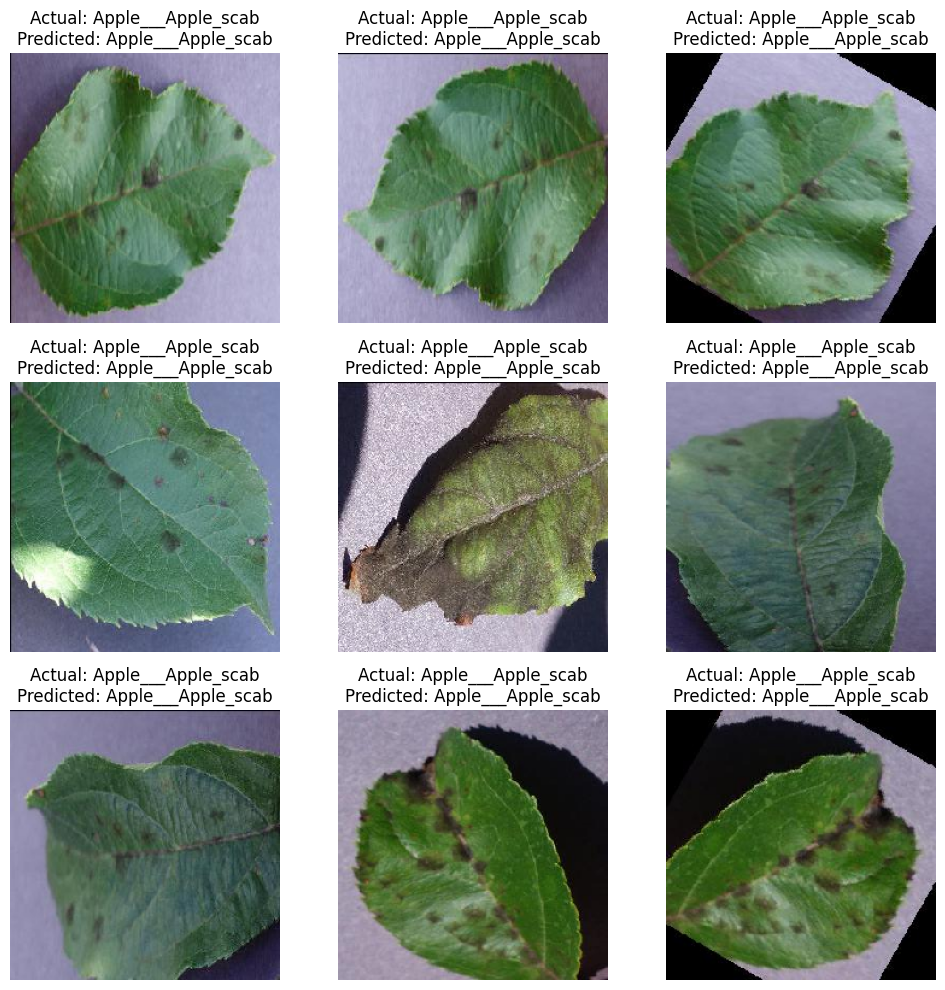

In [27]:
import random
from tensorflow.keras.preprocessing import image

# Get class labels
class_labels = list(valid_generator.class_indices.keys())

# Select random images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i in range(9):
    img_path, label = valid_generator.filepaths[i], class_labels[valid_generator.labels[i]]
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)
    predicted_label = class_labels[np.argmax(pred)]

    # Show Image
    ax = axes[i//3, i%3]
    ax.imshow(img)
    ax.set_title(f"Actual: {label}\nPredicted: {predicted_label}")
    ax.axis("off")

plt.tight_layout()
plt.show()

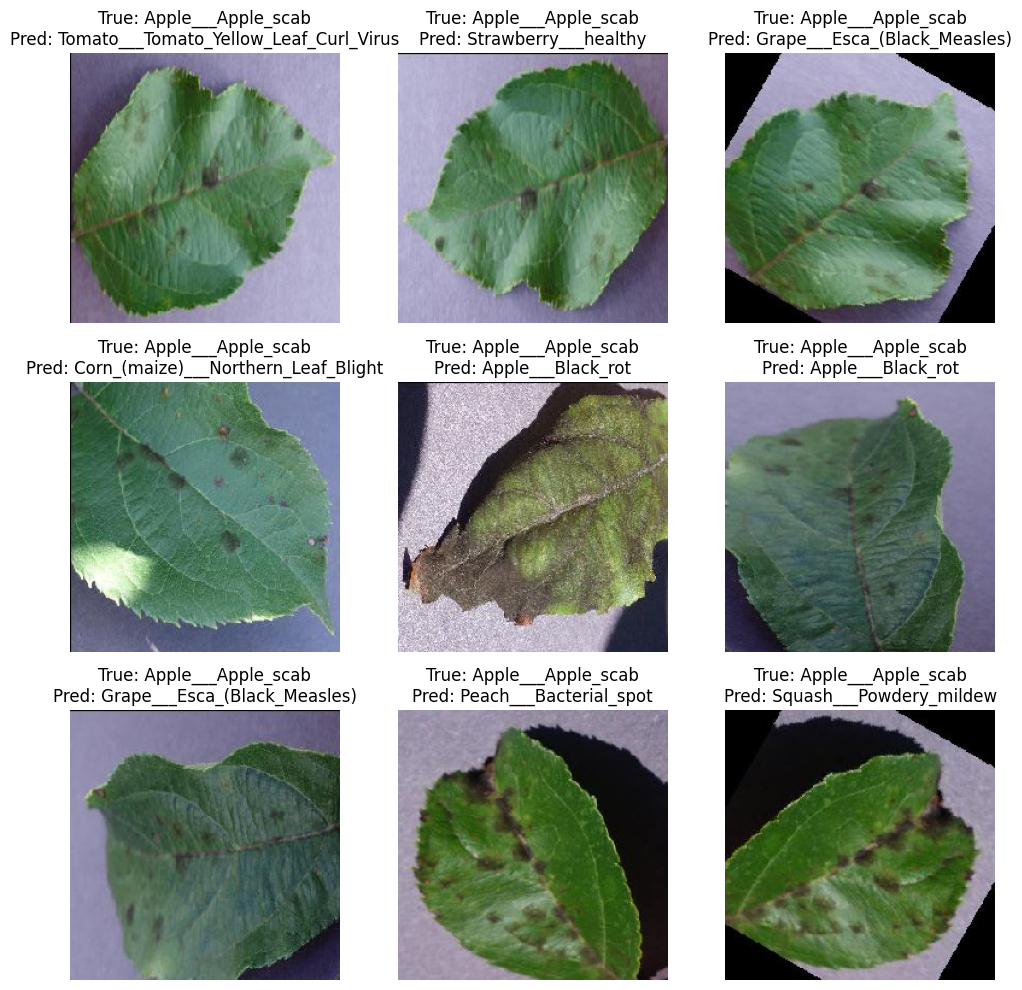

In [28]:
misclassified_idx = np.where(y_true != y_pred_classes)[0]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, idx in enumerate(misclassified_idx[:9]):
    img_path = valid_generator.filepaths[idx]
    img = image.load_img(img_path, target_size=(224, 224))
    ax = axes[i//3, i%3]
    ax.imshow(img)
    ax.set_title(f"True: {class_labels[y_true[idx]]}\nPred: {class_labels[y_pred_classes[idx]]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [34]:
model.save("plant_disease_vgg16_optimized.keras")
print("✅ Model training complete & saved as 'plant_disease_vgg16_optimized.keras'")

✅ Model training complete & saved as 'plant_disease_vgg16_optimized.keras'


In [33]:
# Save the Model
model.save("plant_disease_vgg16_optimized.h5")
print("✅ Model training complete & saved as 'plant_disease_vgg16_optimized.h5'")

✅ Model training complete & saved as 'plant_disease_vgg16_optimized.h5'


In [37]:
from IPython.display import FileLink
FileLink("/kaggle/working/plant_disease_vgg16_optimized.keras")

/kaggle/working/plant_disease_vgg16_optimized.keras

In [38]:
from IPython.display import FileLink
FileLink("/kaggle/working/plant_disease_vgg16_optimized.h5")

/kaggle/working/plant_disease_vgg16_optimized.h5

In [39]:
import shutil
shutil.make_archive("/kaggle/working/plant_disease_vgg16_optimized.keras", 'zip', "/kaggle/working/")

from IPython.display import FileLink
FileLink("/kaggle/working/plant_disease_vgg16_optimized.keras.zip")

/kaggle/working/plant_disease_vgg16_optimized.keras.zip

In [42]:
import shutil
shutil.make_archive("/kaggle/working/plant_disease_model", 'zip', "/kaggle/working", "plant_disease_vgg16_optimized.keras")

'/kaggle/working/plant_disease_model.zip'

In [43]:
from IPython.display import FileLink
FileLink("/kaggle/working/plant_disease_model.zip")

/kaggle/working/plant_disease_model.zip

In [44]:
# List files in the working directory
!ls /kaggle/working/

plant_disease_model.keras	  plant_disease_vgg16_optimized.keras
plant_disease_model.zip		  plant_disease_vgg16_optimized.keras.zip
plant_disease_vgg16_optimized.h5


In [45]:
!zip '/kaggle/working/all_models.zip' \
     '/kaggle/working/plant_disease_model.keras' \
     '/kaggle/working/plant_disease_vgg16_optimized.keras' \
     '/kaggle/working/plant_disease_vgg16_optimized.h5'

  adding: kaggle/working/plant_disease_model.keras (deflated 7%)
  adding: kaggle/working/plant_disease_vgg16_optimized.keras (deflated 7%)
  adding: kaggle/working/plant_disease_vgg16_optimized.h5 (deflated 7%)


In [46]:
from IPython.display import FileLink

# Example for plant_disease_model.keras
FileLink(r'/kaggle/working/plant_disease_model.keras')

# Repeat for other files:
FileLink(r'/kaggle/working/plant_disease_vgg16_optimized.keras')
FileLink(r'/kaggle/working/plant_disease_model.zip')

/kaggle/working/plant_disease_model.zip

In [48]:
!pip install pyngrok

In [52]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create Google Drive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/kaggle/working/plant_disease_vgg16_optimized.h5")
model = load_model("/kaggle/working/plant_disease_vgg16_optimized.keras")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("final_plant_disease_model.h5")
img_path = "/kaggle/input/sample_leaf.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = class_labels[np.argmax(pred)]
print("Predicted Class:", predicted_class)